# **Time Series (Decomposing of Time Series)**

**Decomposing TimeSeries Data**

TimeSeriers data is the data in which current data is depending on previous data with respect to time.It can mainly be of two types: Univariate and Multivariate Data. Univariate data has only single time dependent feature whereas multivariate data has multiple time dependent features.

I have done timeseries analysis on Univariate data, where we are using past 'close' prices to predict future 'close' prices.

**Components of Time-Series Data**

Data which varies over time is called as Time -Series Data. The frequency of data changes yearly, monthly, quaterly, weekly, hourly, per min or per second. Few examples of time series data are: weather readings, stock prices,hear-rate monitoring and speech recording to list afew. TimeSeries data can be either continuous or discrete type and stationary or non-stationary. Stationary data maintains a constant mean and variance whereas non-stationary does not have a constant mean and variance. Most of the data found is non-stationary in nature.Trend, Cyclical, Seasonality and Residual(Irregular or Random) are the compnonets of such kind of data.


---


Trend tells us if data likely has an increasing direction of moving ahead or decreasing direction of moving ahead or is stable. Seasonality tells us the seasonal variation in data that is certainly to occur in a regular manner. It occurs due to natuaral or man-made conditions, such as seasons in a year or festivals throughout the year. Cyclical variations occurs in a complete period of time. Irregular variation is an affect that happens on data due to uncontrollable circumstances.They are mostly unpredictable situations.We can check for the above components in timeseries data using statsmodels.tsa.seasonal_decompose in terms of additive model or multiplcaitve model. Addititve model implies the additive nature of compnents in timeseries data, whereas multiplicative model implies multiplicative nature.

In [2]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install yfinance
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import yfinance as yf
from pmdarima.arima import auto_arima
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 KB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.8/112.8 KB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 30.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 15.9 MB/s eta 0:00:00
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.9.3
    Uninstalling beautifulsoup4-4.9.3:
      Successfully uninstalled beautifulsoup4-

## **Loading the dataset**
We are using historical prices of 3 year for Tesla stock.

In [4]:
tsla = yf.Ticker('TSLA')

# get historical data as hist
hist = tsla.history(period="3y")

# Save dataframe as CSV file
hist.to_csv('TSLA.csv')

In [5]:
stock_data = pd.read_csv('TSLA.csv')
stock_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2020-03-16 00:00:00-04:00,31.299999,32.991333,29.478001,29.671333,307342500,0.0,0.0
1,2020-03-17 00:00:00-04:00,29.334000,31.456667,26.400000,28.680000,359919000,0.0,0.0
2,2020-03-18 00:00:00-04:00,25.933332,26.990667,23.367332,24.081333,356793000,0.0,0.0
3,2020-03-19 00:00:00-04:00,24.980000,30.133333,23.897333,28.509333,452932500,0.0,0.0
4,2020-03-20 00:00:00-04:00,29.213333,31.799999,28.386000,28.502001,424282500,0.0,0.0


In [6]:
stock_data.shape

(757, 8)

In [7]:
# As we are performing UniVariate Time Series Analysis so we will conside only close price.

stock_data = stock_data[['Date','Close']] # filtering the dataframe to date and close price

In [8]:
stock_data.head()

,Date,Close
0,2020-03-16 00:00:00-04:00,29.671333
1,2020-03-17 00:00:00-04:00,28.680000
2,2020-03-18 00:00:00-04:00,24.081333
3,2020-03-19 00:00:00-04:00,28.509333
4,2020-03-20 00:00:00-04:00,28.502001


In [9]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 757 entries, 0 to 756
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    757 non-null    object 
 1   Close   757 non-null    float64
dtypes: float64(1), object(1)
memory usage: 12.0+ KB


pd.to_datetime()#this method we use for coverting into date time

In [16]:
stock_data["Date"] = pd.to_datetime(stock_data["Date"])

In [17]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 757 entries, 0 to 756
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype              
---  ------  --------------  -----              
 0   Date    757 non-null    datetime64[ns, UTC]
 1   Close   757 non-null    float64            
dtypes: datetime64[ns, UTC](1), float64(1)
memory usage: 12.0 KB


In [18]:
stock_data = stock_data.set_index("Date")

In [20]:
stock_data.head(5)

,Close
Date,
2020-03-16 04:00:00+00:00,29.671333
2020-03-17 04:00:00+00:00,28.680000
2020-03-18 04:00:00+00:00,24.081333
2020-03-19 04:00:00+00:00,28.509333
2020-03-20 04:00:00+00:00,28.502001


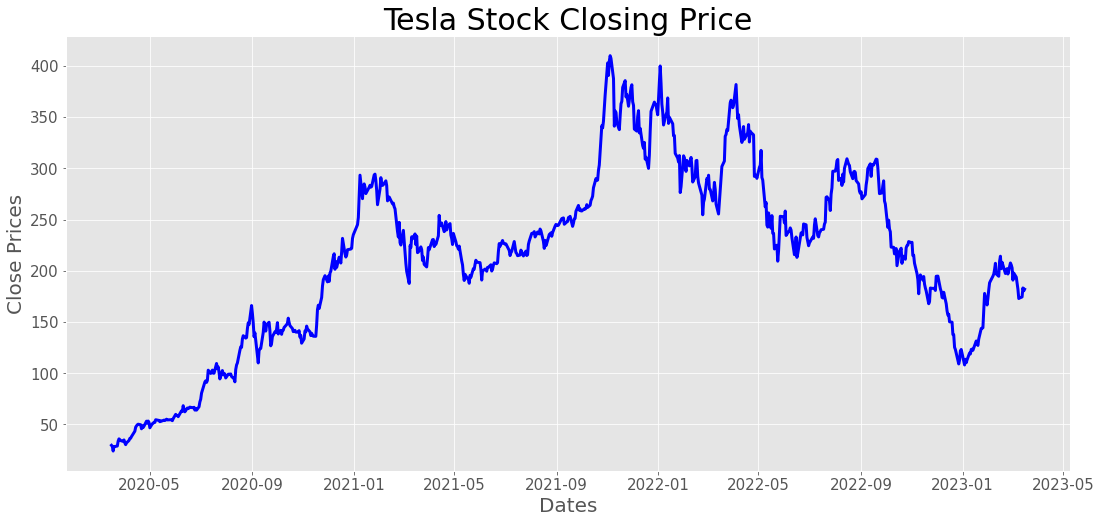

In [21]:
# plotting close price
plt.style.use('ggplot')
plt.figure(figsize=(18,8)) 
plt.grid(True) 
plt.xlabel('Dates', fontsize = 20) 
plt.xticks(fontsize = 15)
plt.ylabel('Close Prices', fontsize = 20)
plt.yticks(fontsize = 15) 

plt.plot(stock_data['Close'], linewidth = 3, color = 'blue')
plt.title('Tesla Stock Closing Price', fontsize = 30)
plt.show()

**A probability distribution can also be used to illustrate the data in our series.**

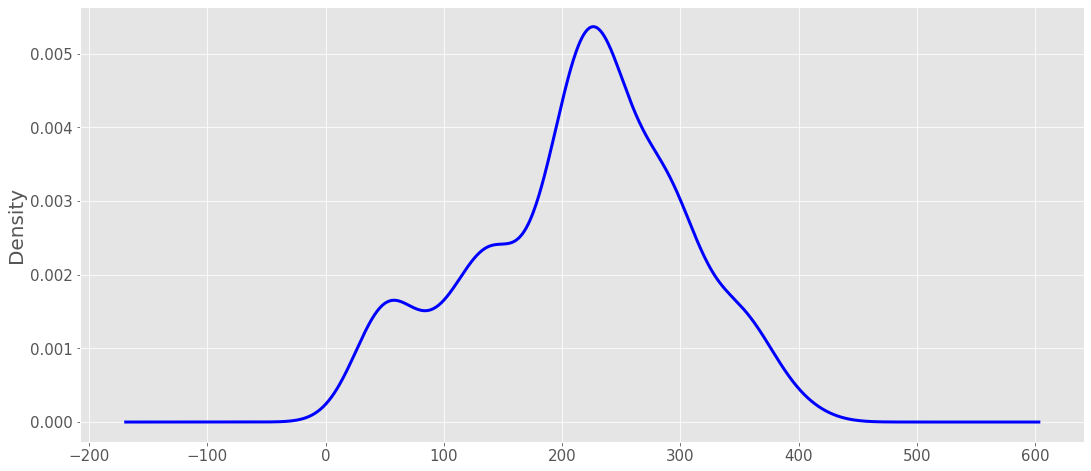

In [75]:
# Distribution of the close price  
df_close = stock_data['Close'] 
df_close.plot(kind='kde',figsize = (18,8), linewidth= 3,color = 'blue')
plt.xticks(fontsize = 15)
plt.grid("both")
plt.ylabel('Density', fontsize = 20)
plt.yticks(fontsize = 15)
plt.show()

<hr style="border:1px solid black"> </hr>
A time series is also thought to include three systematic components: level, trend, and seasonality, as well as one non-systematic component termed noise.

The components' definitions are as follows:
- The **level** is the sum of all the values in a series.
- The **trend** is the upward or downward movement of the series' value.
- The series' short-term cycle is known as **seasonality**.
- **Noise** is the term for the random variation in the series.
------------------------------------
## Check for stationarity

Time series analysis only works with stationary data, so we must first determine **whether a series is stationary.**
Stationary time series is when the mean and variance are constant over time. It is easier to predict when the series is stationary.

**What does it mean for data to be stationary?**

- The mean of the series should not be a function of time. Because the mean increases over time, the red graph below is not stationary.

<img src="https://imgur.com/LjtBXwf.png">
- The variance of the series should not be a function of time. Homoscedasticity is the term for this characteristic. The varying spread of data over time can be seen in the red graph.

<img src="https://imgur.com/v2Uye7X.png">

- Finally, neither the I th term nor the (I + m) th term's covariance should be a function of time. As you can see in the graph below, the spread gets less as time goes on. As a result, the'red series' covariance does not remain constant throughout time.

<img src="https://i.imgur.com/6HVlvg2.png">

<hr style="border:1px solid black"> </hr>

In [23]:
stock_data

,Close
Date,
2020-03-16 04:00:00+00:00,29.671333
2020-03-17 04:00:00+00:00,28.680000
2020-03-18 04:00:00+00:00,24.081333
2020-03-19 04:00:00+00:00,28.509333
2020-03-20 04:00:00+00:00,28.502001
...,...
2023-03-10 05:00:00+00:00,173.440002
2023-03-13 04:00:00+00:00,174.479996
2023-03-14 04:00:00+00:00,183.259995


In [25]:
type(stock_data["Close"])

pandas.core.series.Series

In [27]:
np.mean(stock_data["Close"].head(12))

31.326944986979168

[]

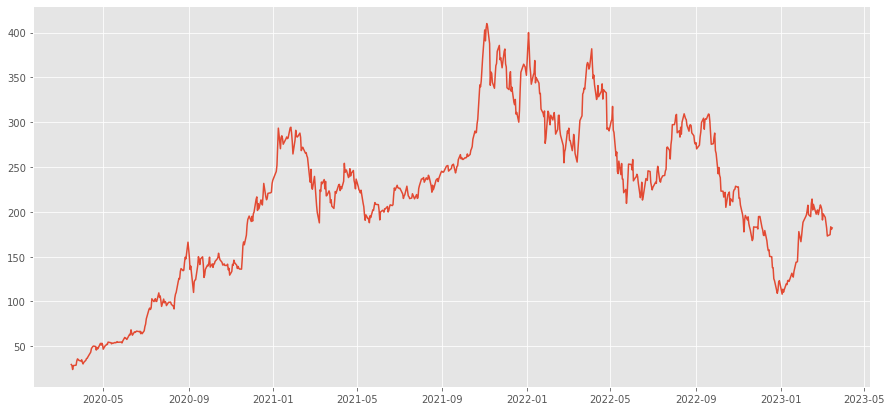

In [35]:
plt.figure(figsize=(15,7))
plt.plot(stock_data["Close"])
plt.plot()

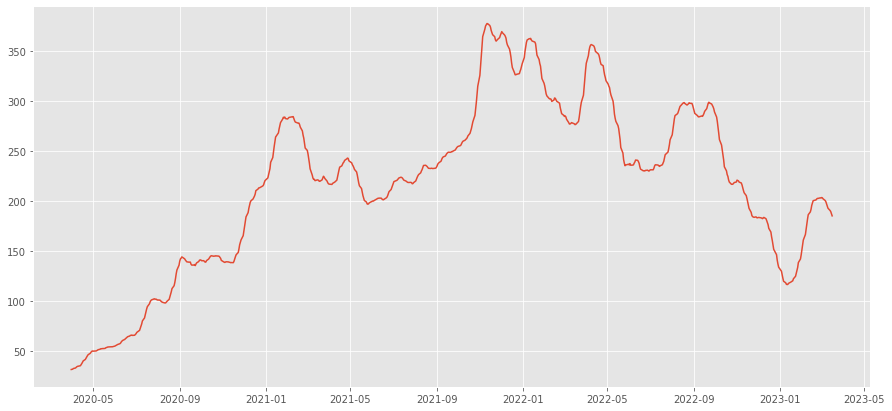

In [36]:
plt.figure(figsize=(15,7))
plt.plot(stock_data["Close"].rolling(12).mean()) # we are goining over the window (window size = 12)
plt.show()

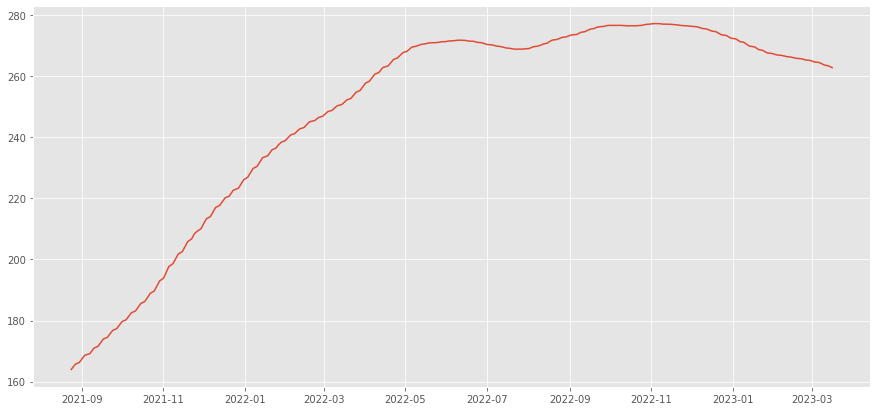

In [37]:
plt.figure(figsize=(15,7))
plt.plot(stock_data["Close"].rolling(365).mean())
plt.show()

In [40]:
adfuller(stock_data["Close"],autolag = "AIC")

(-2.3412408543998935,
 0.1590116271109105,
 9,
 747,
 {'1%': -3.439134355513998,
  '5%': -2.865416893922985,
  '10%': -2.56883447171999},
 5358.815855647926)

## **Note**

### **1. p > 0.05 (Accept the Null Hypo and Reject the Alternate Hypo)**

### **2. P < 0.05 (Accept the Alternate Hypo and Reject the Null Hypo)**

In [41]:
rolmean = stock_data["Close"].rolling(12).mean() # rolling mean
rolstd = stock_data["Close"].rolling(12).std() # rolling standard deviation

In [43]:
rolmean.head(12)

Date
2020-03-16 04:00:00+00:00          NaN
2020-03-17 04:00:00+00:00          NaN
2020-03-18 04:00:00+00:00          NaN
2020-03-19 04:00:00+00:00          NaN
2020-03-20 04:00:00+00:00          NaN
2020-03-23 04:00:00+00:00          NaN
2020-03-24 04:00:00+00:00          NaN
2020-03-25 04:00:00+00:00          NaN
2020-03-26 04:00:00+00:00          NaN
2020-03-27 04:00:00+00:00          NaN
2020-03-30 04:00:00+00:00          NaN
2020-03-31 04:00:00+00:00    31.326945
Name: Close, dtype: float64

In [44]:
np.mean(stock_data["Close"].head(12))

31.326944986979168

In [47]:
#Test for staionarity
def test_stationarity(timeseries):
    # Determing rolling statistics
    rolmean = timeseries.rolling(12).mean() # rolling mean
    rolstd = timeseries.rolling(12).std() # rolling standard deviation
    # Plot rolling statistics:
    plt.figure(figsize = (18,8))
    plt.grid('both')
    plt.plot(timeseries, color='blue',label='Original', linewidth = 3)
    plt.plot(rolmean, color='red', label='Rolling Mean',linewidth = 3)
    plt.plot(rolstd, color='black', label = 'Rolling Std',linewidth = 4)
    plt.legend(loc='best', fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')
    plt.title('Rolling Mean and Standard Deviation', fontsize = 25)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.show(block=False)
    print()
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    # hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)

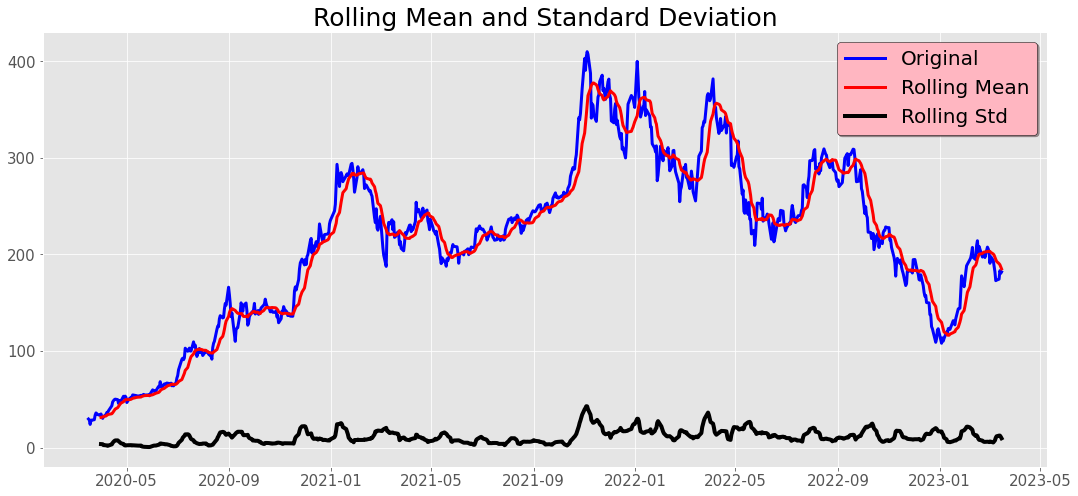


Results of dickey fuller test
Test Statistics                 -2.341241
p-value                          0.159012
No. of lags used                 9.000000
Number of observations used    747.000000
critical value (1%)             -3.439134
critical value (5%)             -2.865417
critical value (10%)            -2.568834
dtype: float64


In [48]:
test_stationarity(stock_data['Close'])

<hr style="border:1px solid black"> </hr>
We can't reject the Null hypothesis because the p-value is bigger than 0.05. Furthermore, the test statistics exceed the critical values. As a result, the data is not stationary.

Differencing is a method of transforming a non-stationary time series into a stationary one. This is an important step in preparing data to be used in an ARIMA model.
So, to make the data stationary, we need to take the first-order difference of the data. Which is just another way of saying, subtract today’s close price from yesterday’s close price.


In [49]:
stock_data["Close"]

Date
2020-03-16 04:00:00+00:00     29.671333
2020-03-17 04:00:00+00:00     28.680000
2020-03-18 04:00:00+00:00     24.081333
2020-03-19 04:00:00+00:00     28.509333
2020-03-20 04:00:00+00:00     28.502001
                                ...    
2023-03-10 05:00:00+00:00    173.440002
2023-03-13 04:00:00+00:00    174.479996
2023-03-14 04:00:00+00:00    183.259995
2023-03-15 04:00:00+00:00    180.449997
2023-03-16 04:00:00+00:00    181.999893
Name: Close, Length: 757, dtype: float64

In [50]:
 28.680000 - 29.671333

-0.9913330000000009

In [52]:
28.509333 -  24.081333

4.428000000000001

In [51]:
# differencing (log 1) 

stock_data["Close"].diff() 

Date
2020-03-16 04:00:00+00:00         NaN
2020-03-17 04:00:00+00:00   -0.991333
2020-03-18 04:00:00+00:00   -4.598667
2020-03-19 04:00:00+00:00    4.427999
2020-03-20 04:00:00+00:00   -0.007332
                               ...   
2023-03-10 05:00:00+00:00    0.520004
2023-03-13 04:00:00+00:00    1.039993
2023-03-14 04:00:00+00:00    8.779999
2023-03-15 04:00:00+00:00   -2.809998
2023-03-16 04:00:00+00:00    1.549896
Name: Close, Length: 757, dtype: float64

In [53]:
# Get the difference of each Adj Close point
tsla_close_diff_1 = df_close.diff()  # Here we can provide values (for Differencing eg:(2))

In [54]:
tsla_close_diff_1

Date
2020-03-16 04:00:00+00:00         NaN
2020-03-17 04:00:00+00:00   -0.991333
2020-03-18 04:00:00+00:00   -4.598667
2020-03-19 04:00:00+00:00    4.427999
2020-03-20 04:00:00+00:00   -0.007332
                               ...   
2023-03-10 05:00:00+00:00    0.520004
2023-03-13 04:00:00+00:00    1.039993
2023-03-14 04:00:00+00:00    8.779999
2023-03-15 04:00:00+00:00   -2.809998
2023-03-16 04:00:00+00:00    1.549896
Name: Close, Length: 757, dtype: float64

### **Do differencing until it converts into stationary data where mean and variance are constant**

In [55]:
tsla_close_diff_1.dropna(inplace = True)

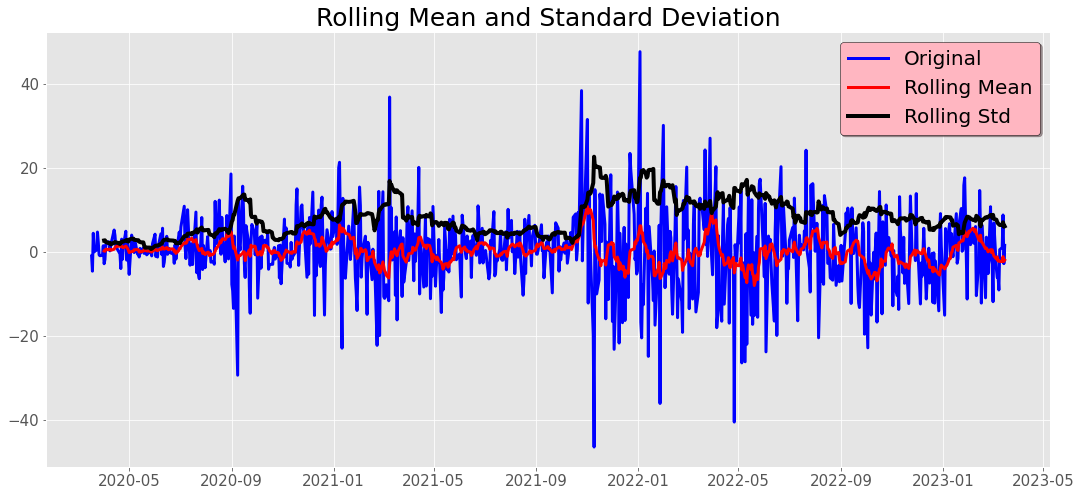


Results of dickey fuller test
Test Statistics               -8.073682e+00
p-value                        1.525542e-12
No. of lags used               9.000000e+00
Number of observations used    7.460000e+02
critical value (1%)           -3.439146e+00
critical value (5%)           -2.865422e+00
critical value (10%)          -2.568837e+00
dtype: float64


In [56]:
# Plot the tsla Adj Close 1st order difference
test_stationarity(tsla_close_diff_1)

The p-value is obtained is less than significance level of 0.05 and the ADF statistic is lower than any of the critical values.

We can reject the null hypothesis. So, the time series is in fact stationary.

**Decompose the time series :**
To start with, we want to decompose the data to seperate the seasonality, trend and residual. Since we have 3 years of stock data. We would expect there's a yearly or weekly pattern. Let's use a function seasonal_decompose in statsmodels to help us find it.

we will try to check the treand in the data

breakdown

season cycle error as well


So after taking Difference, we have converted Non-Stationary Data to Stationary Data using Difference Method. We Subtracted Present Time-Stamp from the Previous Time-stamp.

From the above graph, we can see that Rolling Mean Rolling Std Deviation has constant mean

The p value has become very very less

PLOTTING SEASONALITY, TREND and RESIDUAL in BOTH THE ADDITIVE and MULTIPLICATIVE FORMS

In [59]:
stock_data[["Close"]]

,Close
Date,
2020-03-16 04:00:00+00:00,29.671333
2020-03-17 04:00:00+00:00,28.680000
2020-03-18 04:00:00+00:00,24.081333
2020-03-19 04:00:00+00:00,28.509333
2020-03-20 04:00:00+00:00,28.502001
...,...
2023-03-10 05:00:00+00:00,173.440002
2023-03-13 04:00:00+00:00,174.479996
2023-03-14 04:00:00+00:00,183.259995


### **seasonal_decompose -> responsible for Decomposing the Time Series**

### **PLOTTING SEASONALITY, TREND and RESIDUAL in BOTH THE ADDITIVE and MULTIPLICATIVE FORMS**

**additive time series**

<Figure size 1440x720 with 0 Axes>

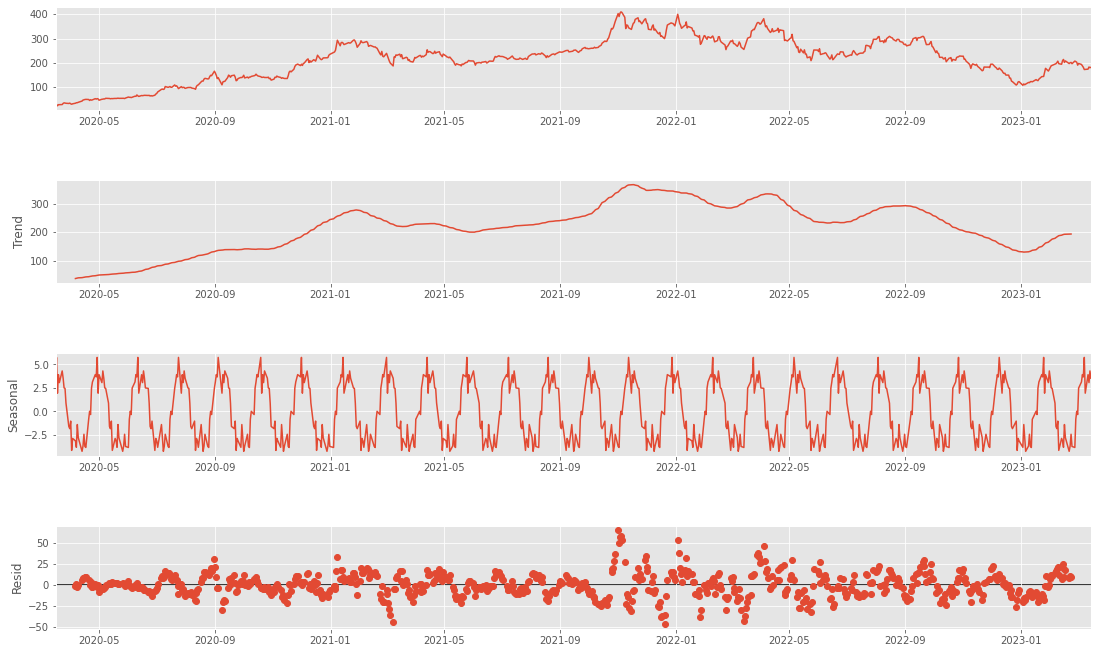

In [70]:
# additive time series

result=seasonal_decompose(stock_data[["Close"]],period=30)
fig=plt.figure(figsize=(20,10))
fig=result.plot()
fig.set_size_inches(17,10)

**multiplicative time series**

<Figure size 1440x720 with 0 Axes>

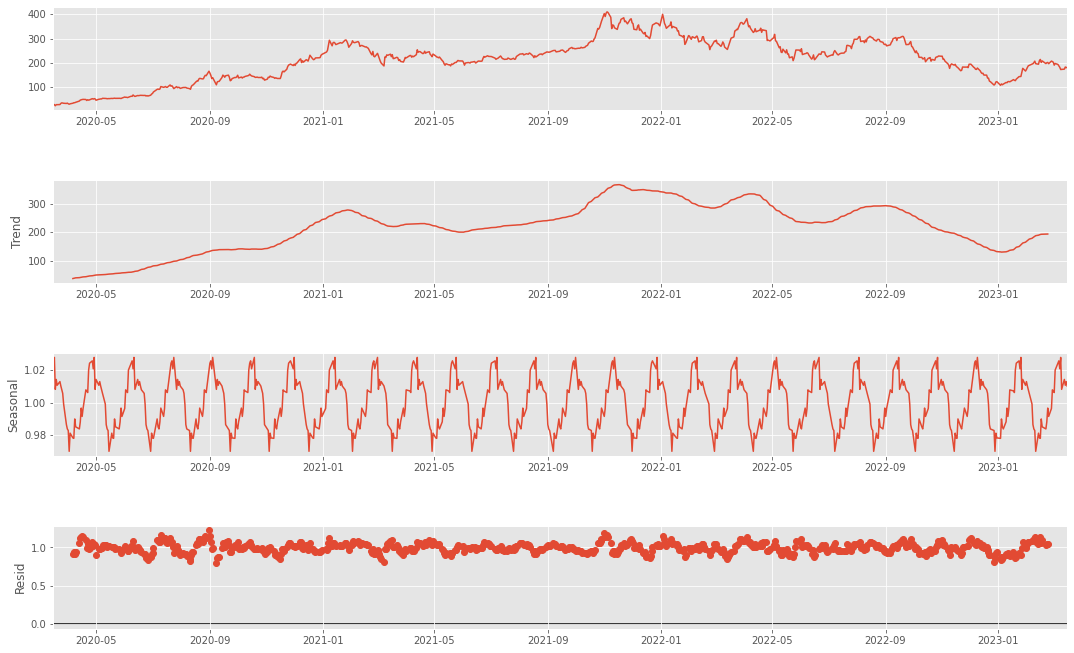

In [78]:
# multiplicative time series

result=seasonal_decompose(stock_data[["Close"]],model="multiplicative",period=30)
fig=plt.figure(figsize=(20,10))
fig=result.plot()
fig.set_size_inches(17,10)